In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [10]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [11]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [12]:
SI1= df[(df['city'] == 'Mumbai') & (df['product'] == 'Steam Iron')]

In [13]:
SI1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Steam Iron,11-01-2017,Mumbai,650167
2017-12-01,Steam Iron,12-01-2017,Mumbai,1468291
2018-01-01,Steam Iron,01-01-2018,Mumbai,1359409
2018-02-01,Steam Iron,02-01-2018,Mumbai,868654
2018-03-01,Steam Iron,03-01-2018,Mumbai,1296810


In [14]:
SI1.shape

(48, 4)

In [15]:
SI= SI1.drop('date', axis = 1)

In [16]:
SI.head()

,product,city,sales
Date,,,
2014-04-01,Steam Iron,Mumbai,946311
2014-05-01,Steam Iron,Mumbai,1364932
2014-06-01,Steam Iron,Mumbai,1035778
2014-07-01,Steam Iron,Mumbai,1308104
2014-08-01,Steam Iron,Mumbai,1388389


In [17]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

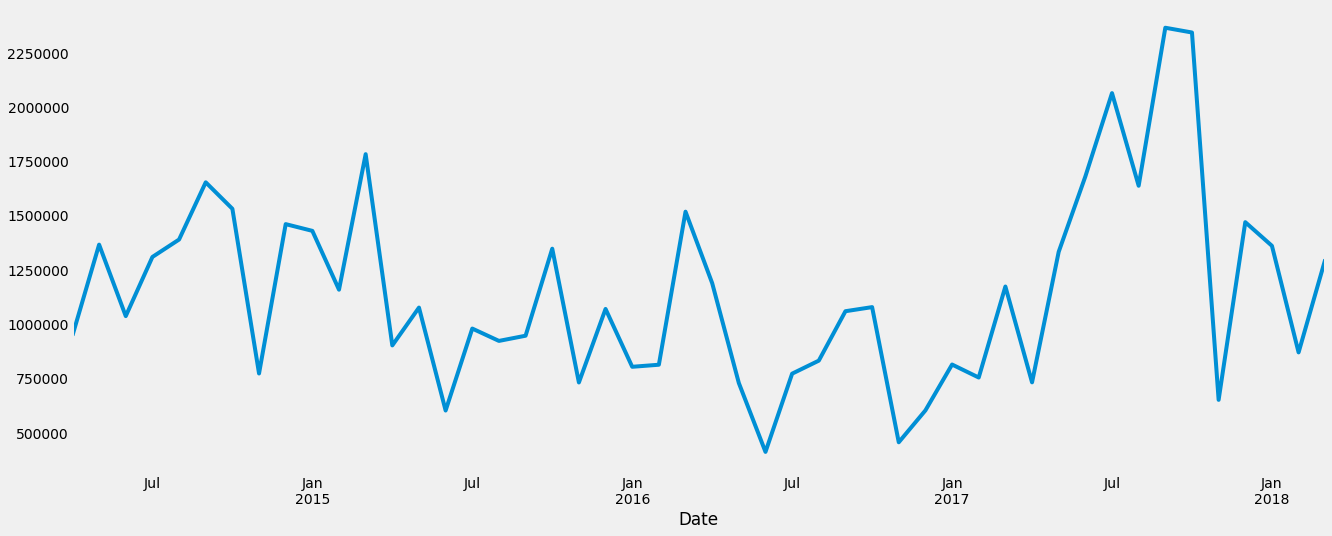

In [18]:
SI['sales'].plot()
plt.grid();

In [19]:
SI.sort_index(inplace= True)

In [20]:
SI.head()

,product,city,sales
Date,,,
2014-04-01,Steam Iron,Mumbai,946311
2014-05-01,Steam Iron,Mumbai,1364932
2014-06-01,Steam Iron,Mumbai,1035778
2014-07-01,Steam Iron,Mumbai,1308104
2014-08-01,Steam Iron,Mumbai,1388389


In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

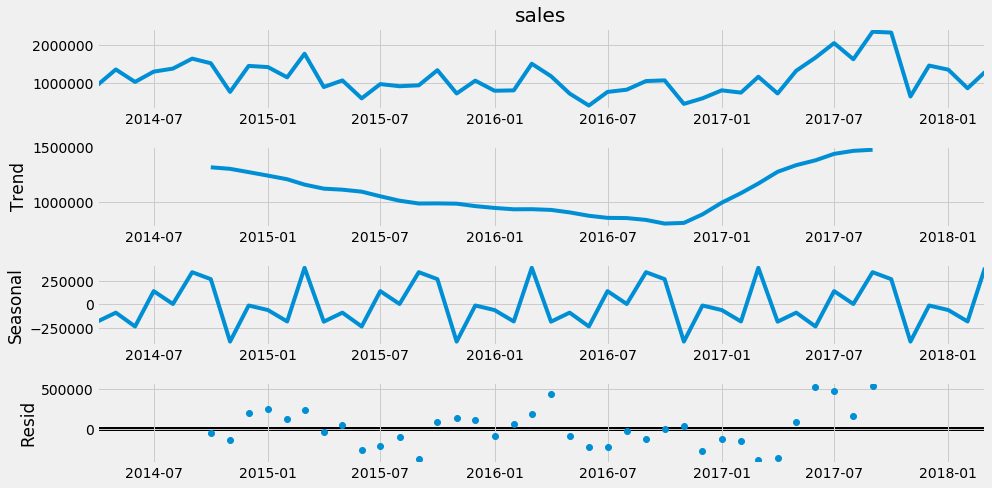

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(SI['sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.316710e+06
2014-11-01    1.302737e+06
2014-12-01    1.272542e+06
2015-01-01    1.240691e+06
2015-02-01    1.207505e+06
2015-03-01    1.158624e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -182340.625000
2014-05-01    -86806.347222
2014-06-01   -233314.347222
2014-07-01    141346.263889
2014-08-01      5104.763889
2014-09-01    342233.000000
2014-10-01    268525.888889
2014-11-01   -393576.680556
2014-12-01    -10989.527778
2015-01-01    -59147.791667
2015-02-01   -180168.611111
2015-03-01    389134.013889
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -55347.847222
2014-11-01   -137541.069444
2014-

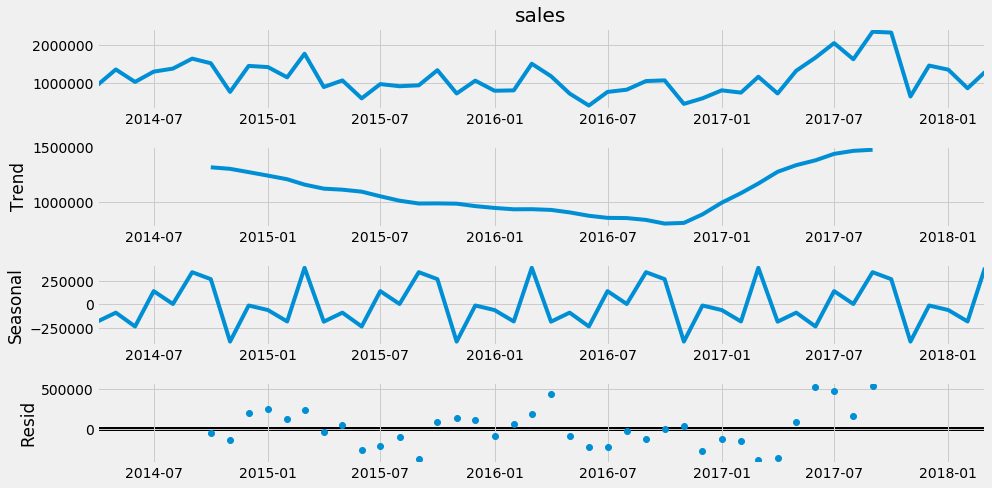

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(SI['sales'],model='Multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.316710e+06
2014-11-01    1.302737e+06
2014-12-01    1.272542e+06
2015-01-01    1.240691e+06
2015-02-01    1.207505e+06
2015-03-01    1.158624e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -182340.625000
2014-05-01    -86806.347222
2014-06-01   -233314.347222
2014-07-01    141346.263889
2014-08-01      5104.763889
2014-09-01    342233.000000
2014-10-01    268525.888889
2014-11-01   -393576.680556
2014-12-01    -10989.527778
2015-01-01    -59147.791667
2015-02-01   -180168.611111
2015-03-01    389134.013889
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -55347.847222
2014-11-01   -137541.069444
2014-

In [26]:
SI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [27]:
train    =   SI[0:int(len(SI)*0.7)] 
test     =  SI[int(len(SI)*0.7):]

In [28]:
train.shape

(33, 3)

In [29]:
test.shape

(15, 3)

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Steam Iron,Mumbai,946311
2014-05-01,Steam Iron,Mumbai,1364932
2014-06-01,Steam Iron,Mumbai,1035778
2014-07-01,Steam Iron,Mumbai,1308104
2014-08-01,Steam Iron,Mumbai,1388389


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Steam Iron,Mumbai,830726
2016-09-01,Steam Iron,Mumbai,1058321
2016-10-01,Steam Iron,Mumbai,1077175
2016-11-01,Steam Iron,Mumbai,454856
2016-12-01,Steam Iron,Mumbai,601712


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Steam Iron,Mumbai,812847
2017-02-01,Steam Iron,Mumbai,752991
2017-03-01,Steam Iron,Mumbai,1172070
2017-04-01,Steam Iron,Mumbai,730680
2017-05-01,Steam Iron,Mumbai,1331748


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Steam Iron,Mumbai,650167
2017-12-01,Steam Iron,Mumbai,1468291
2018-01-01,Steam Iron,Mumbai,1359409
2018-02-01,Steam Iron,Mumbai,868654
2018-03-01,Steam Iron,Mumbai,1296810


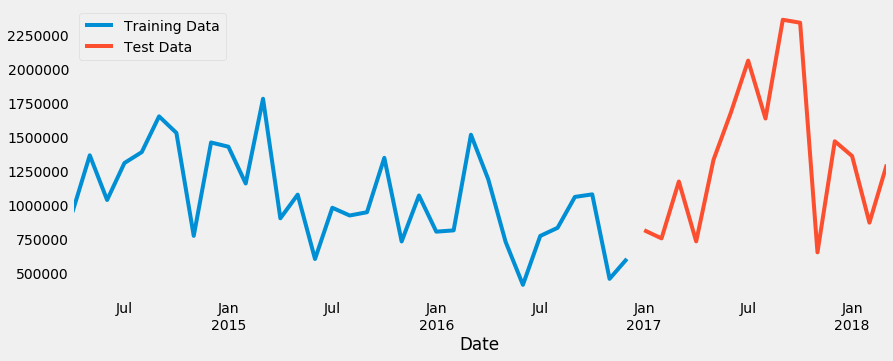

In [31]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [33]:
from sklearn import metrics

Simpleaverage

In [34]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [35]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Steam Iron,Mumbai,812847,1.049743e+06
2017-02-01,Steam Iron,Mumbai,752991,1.049743e+06
2017-03-01,Steam Iron,Mumbai,1172070,1.049743e+06
2017-04-01,Steam Iron,Mumbai,730680,1.049743e+06
2017-05-01,Steam Iron,Mumbai,1331748,1.049743e+06


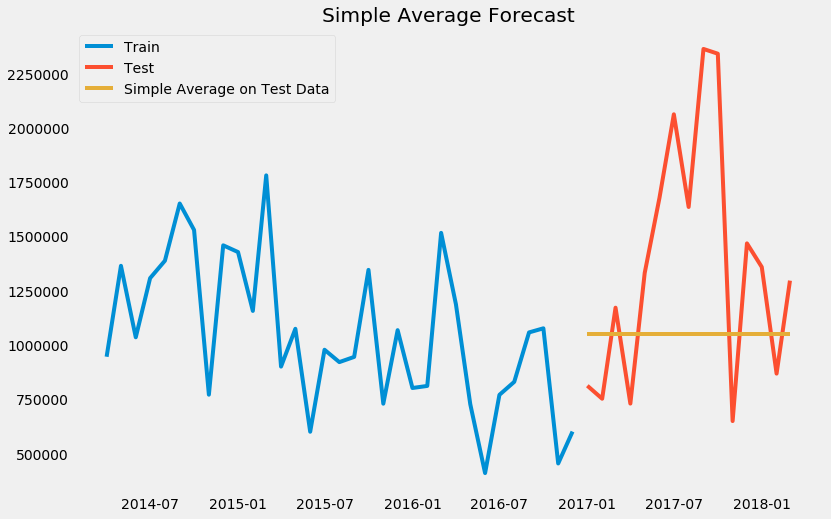

In [36]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [37]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 633767.872


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,633767.871701


In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [40]:
SES_train = train.copy()
SES_test = test.copy()

In [41]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
model_SES_autofit = model_SES.fit(optimized=True)

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [43]:
model_SES_autofit.params

{'smoothing_level': 0.23523255813953486,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 946311.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Steam Iron,Mumbai,812847,771035.33676
2017-02-01,Steam Iron,Mumbai,752991,771035.33676
2017-03-01,Steam Iron,Mumbai,1172070,771035.33676
2017-04-01,Steam Iron,Mumbai,730680,771035.33676
2017-05-01,Steam Iron,Mumbai,1331748,771035.33676


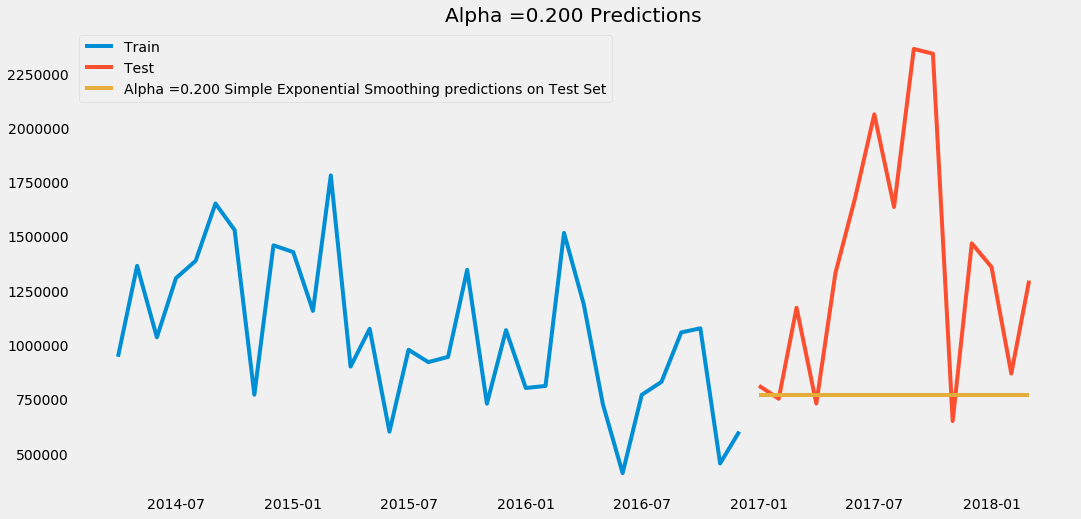

In [45]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.200 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.200 Predictions');

In [46]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.200 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.200 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 810531.634


In [47]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 36.968549440672284


In [49]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.200,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549


In [50]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [51]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [52]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,338649.558047,728516.910815
1,0.2,329266.649922,794838.945113
2,0.3,329650.633293,834484.626408
3,0.4,334598.676776,865260.496493
4,0.5,341874.517064,892310.731178
5,0.6,350642.289962,916015.610899
6,0.7,360793.404862,934752.746482
7,0.8,372635.467680,946395.659538
8,0.9,386686.548179,949231.094323


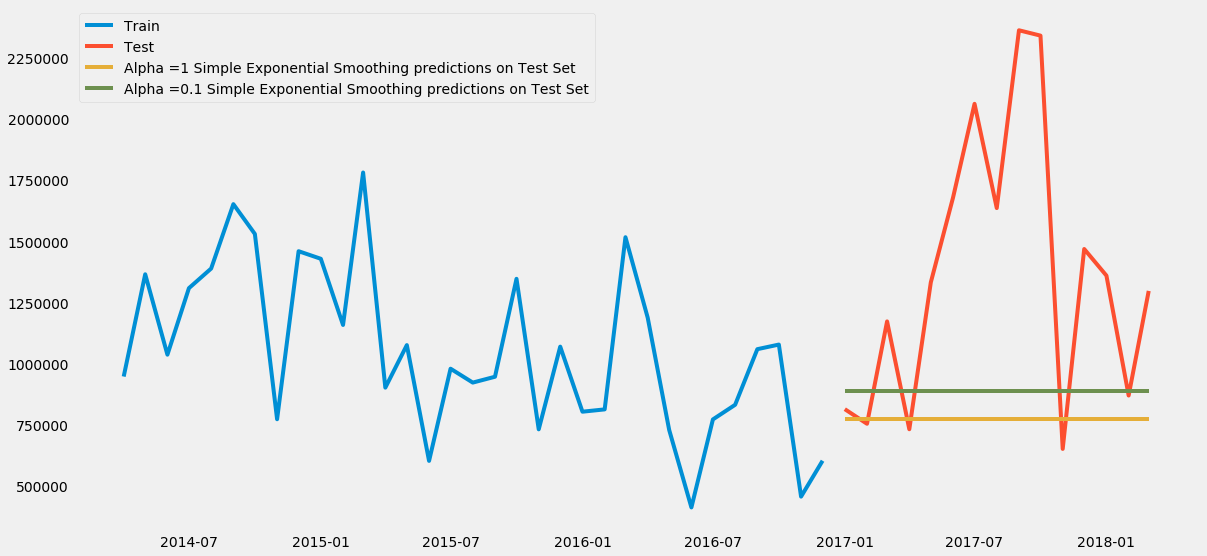

In [53]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [54]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1
                                                                ])
print('\nMAPE:',mape)


MAPE: 35.004747109788376


In [55]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747


Double

In [56]:
DES_train = train.copy()
DES_test = test.copy()

In [57]:
model_DES = Holt(DES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [58]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [59]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [60]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.704011e+06,1.254853e+06
1,0.1,0.2,1.200738e+06,1.907205e+06
2,0.1,0.3,1.002320e+06,9.913110e+05
3,0.1,0.4,8.712682e+05,5.667076e+05
4,0.1,0.5,7.802514e+05,5.391491e+05
...,...,...,...,...
95,1.0,0.6,5.479137e+05,1.316383e+06
96,1.0,0.7,5.779204e+05,1.102099e+06
97,1.0,0.8,6.114521e+05,8.088949e+05
98,1.0,0.9,6.493002e+05,5.968616e+05


In [61]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
4,0.1,0.5,780251.434914,539149.059191
3,0.1,0.4,871268.244499,566707.563379
98,1.0,0.9,649300.173349,596861.645318
5,0.1,0.6,715524.144114,673474.395830
97,1.0,0.8,611452.073046,808894.885142


In [62]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.5])
print('\nMAPE:',mape)


MAPE: 37.68354800962408


In [63]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",539149.059191,37.683548


In [64]:
TES_train = train.copy()
TES_test = test.copy()

In [65]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [66]:
model_TES_autofit = model_TES.fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [67]:
model_TES_autofit.params

{'smoothing_level': 0.11107142857142857,
 'smoothing_trend': 0.061706349206349195,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 1356258.830555555,
 'initial_trend': -30619.863888888824,
 'initial_seasons': array([0.82610701, 0.99412134, 0.56493547, 0.95672262, 0.93719412,
        0.98632483, 1.19498174, 0.60916929, 1.17943   , 1.18396603,
        0.98575489, 1.58129267]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Steam Iron,Mumbai,812847,8.459585e+05
2017-02-01,Steam Iron,Mumbai,752991,6.839978e+05
2017-03-01,Steam Iron,Mumbai,1172070,1.064604e+06
2017-04-01,Steam Iron,Mumbai,730680,5.391448e+05
2017-05-01,Steam Iron,Mumbai,1331748,6.282310e+05


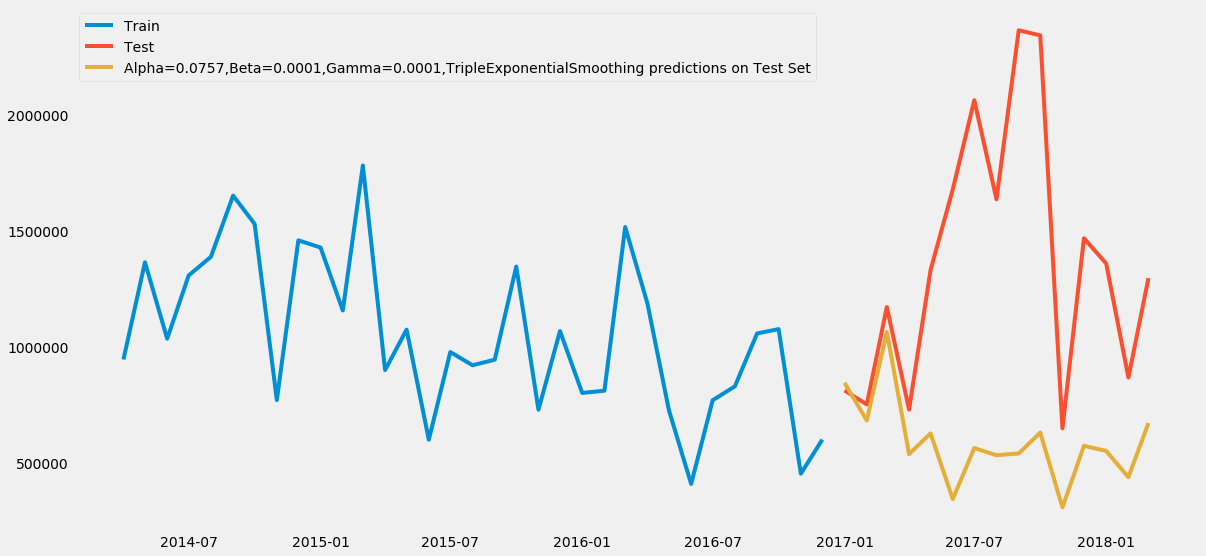

In [69]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [70]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.0757,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.0757,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 971691.146


In [71]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 49.39850379479493


In [72]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",539149.059191,37.683548
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",971691.146397,49.398504


In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [74]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [75]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,1.763270e+05,9.552304e+05
1,0.1,0.1,0.2,1.776144e+05,9.573826e+05
2,0.1,0.1,0.3,1.794020e+05,9.594733e+05
3,0.1,0.1,0.4,1.816361e+05,9.613824e+05
4,0.1,0.1,0.5,1.842984e+05,9.629434e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,1.504719e+06,8.413225e+06
996,1.0,1.0,0.7,2.326939e+06,2.570954e+07
997,1.0,1.0,0.8,1.504605e+06,1.335025e+07
998,1.0,1.0,0.9,2.036017e+06,2.459282e+07


In [76]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
196,0.2,1.0,0.7,276712.561188,476537.176400
187,0.2,0.9,0.8,279771.078795,499866.271241
195,0.2,1.0,0.6,267806.402888,516976.273030
188,0.2,0.9,0.9,289457.269507,524654.474307
197,0.2,1.0,0.8,286474.475959,529700.021380


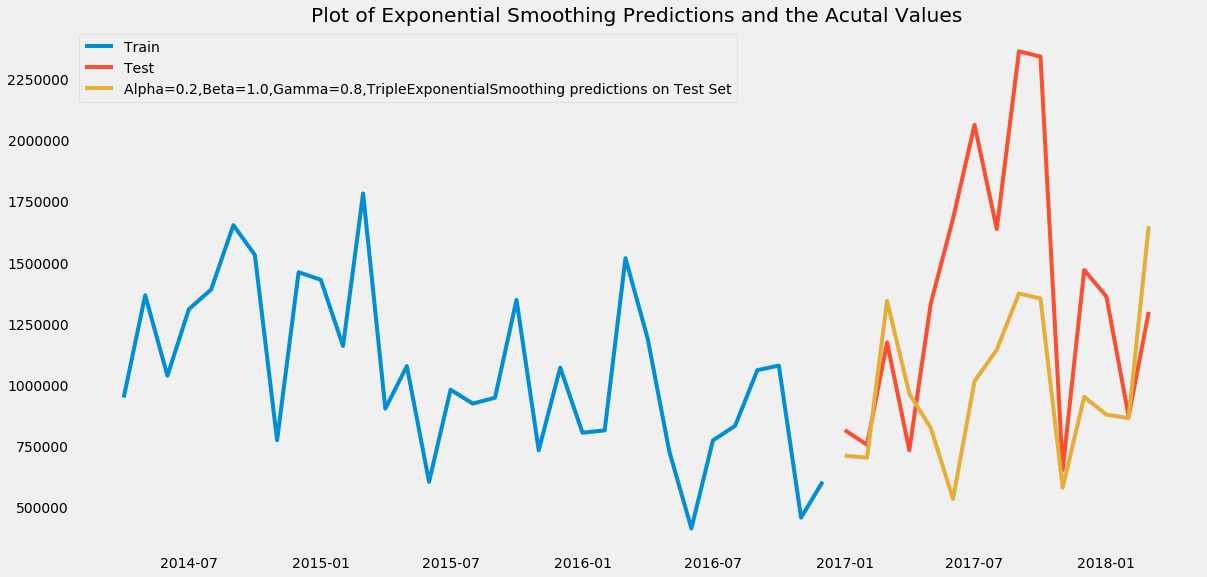

In [77]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.2000000000000000, 1.0000000000000000, 0.5], label='Alpha=0.2,Beta=1.0,Gamma=0.8,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [78]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.2,1.0,0.5])
print('\nMAPE:',mape)


MAPE: 29.857282622091358


In [79]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",539149.059191,37.683548
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",971691.146397,49.398504
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",476537.176400,29.857283


In [80]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",476537.176400,29.857283
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",539149.059191,37.683548
Simple Average,633767.871701,NaN
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",971691.146397,49.398504


In [81]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

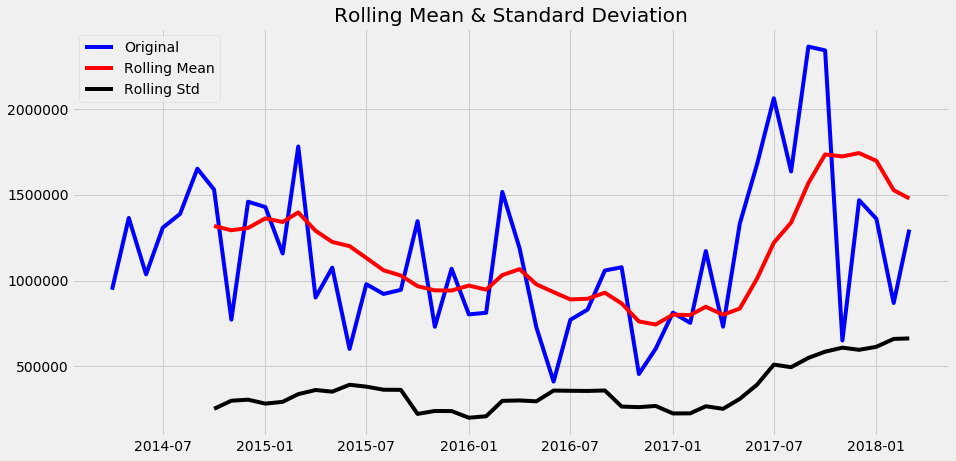

Results of Dickey-Fuller Test:
Test Statistic                 -4.371106
p-value                         0.000334
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64 



In [82]:
test_stationarity(SI['sales'])

In [83]:
#test_stationarity(IC['sales'].diff().dropna())

In [84]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [85]:
test.dropna(inplace=True)

In [86]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [89]:

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [90]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:1021.6597399622794
ARIMA(0, 0, 1) - AIC:938.4031447316512
ARIMA(0, 0, 2) - AIC:939.0818559302616
ARIMA(0, 0, 3) - AIC:941.1983746302162
ARIMA(1, 0, 0) - AIC:937.759365677343
ARIMA(1, 0, 1) - AIC:938.567155473054
ARIMA(1, 0, 2) - AIC:941.0278630849009
ARIMA(1, 0, 3) - AIC:942.44279996421
ARIMA(2, 0, 0) - AIC:939.1819794527315
ARIMA(2, 0, 1) - AIC:940.5253184063822
ARIMA(2, 0, 2) - AIC:939.2873353369043
ARIMA(2, 0, 3) - AIC:943.1328591584909
ARIMA(3, 0, 0) - AIC:941.1923653604362
ARIMA(3, 0, 1) - AIC:941.3258925410204


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(3, 0, 2) - AIC:943.0018593225797
ARIMA(3, 0, 3) - AIC:943.1601855818305


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [91]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
4,"(1, 0, 0)",937.759366
1,"(0, 0, 1)",938.403145
5,"(1, 0, 1)",938.567155
2,"(0, 0, 2)",939.081856
8,"(2, 0, 0)",939.181979


In [92]:
auto_ARIMA = ARIMA(train['sales'], order=(1,0,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -465.880
Date:                Sat, 11 Sep 2021   AIC                            937.759
Time:                        16:35:00   BIC                            942.249
Sample:                    04-01-2014   HQIC                           939.270
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+06   8.17e+04     12.846      0.000     8.9e+05    1.21e+06
ar.L1          0.2747      0.198      1.390      0.165      -0.113       0.662
sigma2      1.099e+11      0.025   4.46e+12      0.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


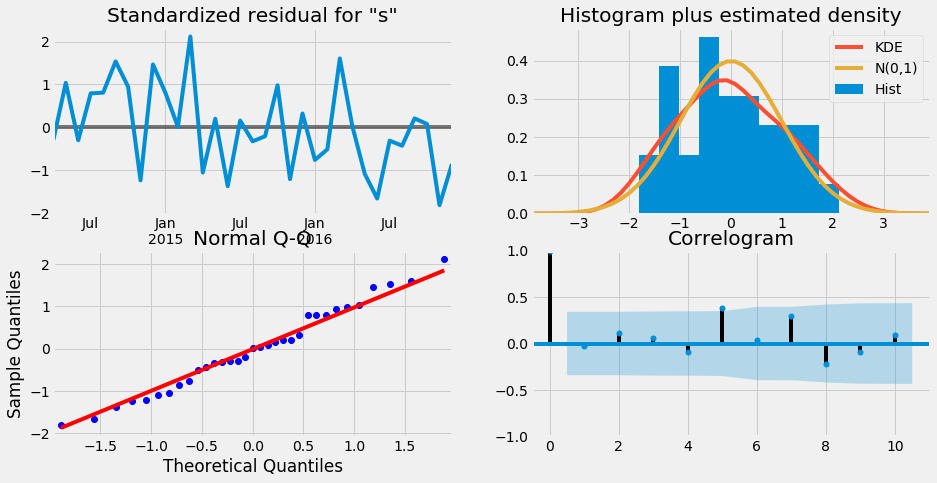

In [93]:
results_auto_ARIMA.plot_diagnostics();

In [94]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [95]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [96]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 630574.3275163041 
MAPE: 34.034349156056564


In [97]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,0,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,633767.871701,NaN
"Alpha=0.200,SimpleExponentialSmoothing",810531.634387,36.968549
"Alpha=0.1,SimpleExponentialSmoothing",728516.910815,35.004747
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",539149.059191,37.683548
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",971691.146397,49.398504
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",476537.176400,29.857283
"ARIMA(1,0,0)",29.857283,34.034349


In [99]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [100]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [101]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:896.5701866677689
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:542.2008594174722
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:202.3904998606725
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:521.3278951487259
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:502.10197943499696
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:204.39052221897367


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:228.63960969790793
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:228.95047758106892
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:206.39029116496496


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:851.9621729228239
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:519.2760475593966
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:196.5290492217789


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:572.0959390977557
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:520.1915801545704


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:198.51304198558017
SARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:250.39851101929625


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:252.3985108304306


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:200.51162647587176
SARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:822.0143608201021
SARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:493.30805123045525


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:171.4201428365126
SARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:573.5831660056368


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:494.830817394947
SARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:173.44642352763904


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:252.16620389593228


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:254.14904604940614


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:175.4174896209366
SARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:12.0
SARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:791.584059461117


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:466.3162777473263
SARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:145.88619744820915


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:573.0159101473791
SARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:467.6375315213563


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:147.88617585668806
SARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:253.06088812194997
SARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:255.06088800636638


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:149.91641127085018
SARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:14.0
SARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:20.0
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:832.868840476905
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:512.4813167481697
SARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:208.15236063990096


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:509.30973720027885
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:511.02445107117416
SARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:210.1523454452115


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:12.0
SARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:208.15218496995917
SARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:210.15219035561864


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:212.15222946678742
SARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:10.0
SARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:12.0
SARIMA(1, 0, 0)x(3, 0, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(3, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:796.0385920435134
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:484.3244123377577


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:183.13874351335187
SARIMA(1, 0, 1)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:508.0857175506619


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:484.84815732914507
SARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:185.61395300086906


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:208.4235407956279


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:210.42353867868482


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:187.4755532834011
SARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:12.0
SARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:772.8724789544094


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:457.83774075920695


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:159.57168455375168
SARIMA(1, 0, 2)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:506.6799923930335


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:458.69587035746156


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:161.16162065740025
SARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:208.52803607360076


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:210.86422272910076


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:163.2855542254008
SARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:14.0
SARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:748.8195170048582


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:431.5672196869695
SARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:136.32010662801207
SARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:508.90676534972766
SARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:434.09763700008375


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:138.32047752968415
SARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:210.39355956443416


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:212.1571929775894


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:140.32032261967737
SARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:802.0077733564881


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:512.0386833608047
SARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:208.0151486538973
SARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:482.29319322478904
SARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:483.66764584850574


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:210.01513297969836
SARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:183.3372359477524


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:185.33724076622616
SARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:187.33728704690495
SARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:12.0
SARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(2, 0, 0)x(3, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:792.9216170311789
SARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:486.2890328650092


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:185.1210020342851
SARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:484.16926955365903


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:485.3987894995127


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:187.12023485368647
SARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:185.18280985076882


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:187.15818856403152


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:189.1561353401823
SARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:14.0
SARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:761.9278790031534


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:458.7206084791845


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:161.30475276970122
SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:480.804473019828


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:460.3187474221142


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:163.06251215865942
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:185.8252756425643


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:187.85300243093633


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:164.68279214152608
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:739.7557298589367


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:432.35585405619287
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:137.78939176426113
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:485.1429363631846


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:434.9507719028198


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:139.78846228148885
SARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:186.74056823864206


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:188.8261802958869


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:141.78870450229243
SARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:777.6834887142011
SARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:513.7203977760107
SARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:209.7221622625383


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:458.823356653379
SARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:459.7089956191966


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:211.72217976250346
SARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:160.24829601561856
SARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:162.2482992820511


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 2, 12)12 - AIC:164.24832471050883


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(3, 0, 0)x(3, 0, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(3, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:769.4962351414212


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:490.23891859742326


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:187.11863161832326


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:460.89445895672986
SARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:461.9457479242895


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:189.11822405217788
SARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:162.23596360016984


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:164.21329520116512
SARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:166.09034368593032
SARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(3, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:763.7550765157793
SARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:459.5178831119351


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:166.33328409789286
SARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:461.3268442758397


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:461.2372930451413


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:167.86649499434202
SARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:167.89777838629388


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:167.87827422916672


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:170.2061583666225
SARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 2)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:744.8031393726928


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:436.4961288594683
SARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:139.67190844455348
SARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:460.846479214562
SARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:434.5587081405197


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:141.67139641823283
SARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:164.30777214905254
SARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:166.00599753150595


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:143.6713631114569


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:24.0
SARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:22.0
SARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:26.0


In [102]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
67,"(1, 0, 0)","(0, 0, 3, 12)",10.0
28,"(0, 0, 1)","(3, 0, 0, 12)",10.0
7,"(0, 0, 0)","(1, 0, 3, 12)",10.0


In [103]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(0,0,3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Sat, 21 Aug 2021   AIC                              8.000
Time:                                  19:16:51   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [104]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [105]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,76067.714253,-149089.980322,149089.980322
2017-02-01,0.0,76067.714253,-149089.980322,149089.980322
2017-03-01,0.0,76067.714253,-149089.980322,149089.980322
2017-04-01,0.0,76067.714253,-149089.980322,149089.980322
2017-05-01,0.0,76061.140878,-149077.096744,149077.096744


In [106]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 115211494610.13333 
MAPE: 100.0


In [107]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.282509e+05,NaN
"Alpha=0.200,SimpleExponentialSmoothing",1.593167e+05,33.759784
"Alpha=0.1,SimpleExponentialSmoothing",1.442130e+05,33.565227
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.246428e+05,32.715858
"Alpha=0.111,Beta=0.740,Gamma=0.000,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.00010,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",1.033429e+05,26.357140
"ARIMA(1,0,0)",2.635714e+01,33.046476
"SARIMA(0,0,0)(0,0,3)12",1.152115e+11,100.000000


In [108]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,0)",2.635714e+01,33.046476
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",1.033429e+05,26.357140
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.246428e+05,32.715858
Simple Average,1.282509e+05,NaN
"Alpha=0.1,SimpleExponentialSmoothing",1.442130e+05,33.565227
"Alpha=0.200,SimpleExponentialSmoothing",1.593167e+05,33.759784
"Alpha=0.111,Beta=0.740,Gamma=0.000,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.00010,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.748133e+05,32.715858
"SARIMA(0,0,0)(0,0,3)12",1.152115e+11,100.000000


In [109]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [110]:
SI.head()

,product,city,sales
Date,,,
2014-04-01,Steam Iron,Kolkata,224120
2014-05-01,Steam Iron,Kolkata,323264
2014-06-01,Steam Iron,Kolkata,245309
2014-07-01,Steam Iron,Kolkata,309805
2014-08-01,Steam Iron,Kolkata,328819


In [111]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(SI1['date'])
df_prophet['y'] =SI1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,147550
2017-12-01,2017-12-01,333216
2018-01-01,2018-01-01,308506
2018-02-01,2018-02-01,197133
2018-03-01,2018-03-01,294300


In [112]:
df_prophet.shape

(48, 2)

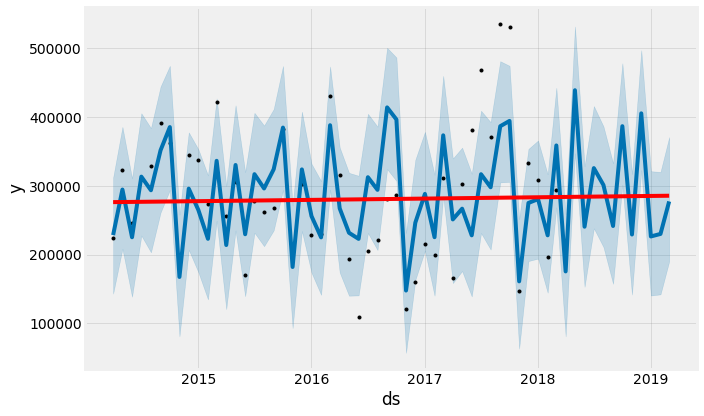

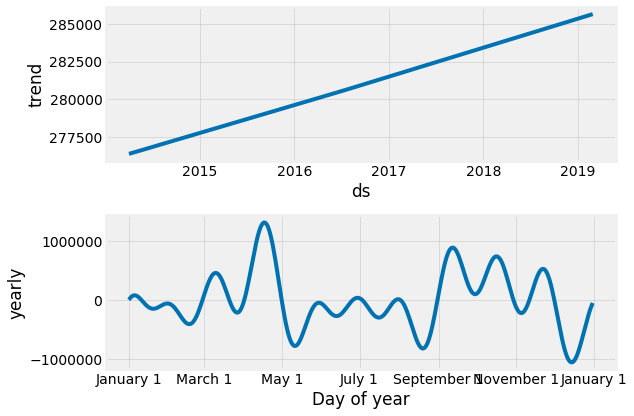

In [113]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [114]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,276371.886200,143136.143431,311976.342812,276371.886200,276371.886200,-47959.213322,-47959.213322,-47959.213322,-47959.213322,-47959.213322,-47959.213322,0.0,0.0,0.0,228412.672878
1,2014-05-01,276524.254880,208536.517668,385863.706923,276524.254880,276524.254880,18170.093269,18170.093269,18170.093269,18170.093269,18170.093269,18170.093269,0.0,0.0,0.0,294694.348149
2,2014-06-01,276681.702517,138649.489107,310954.111711,276681.702517,276681.702517,-51442.849405,-51442.849405,-51442.849405,-51442.849405,-51442.849405,-51442.849405,0.0,0.0,0.0,225238.853112
3,2014-07-01,276834.071198,227725.406084,405659.913531,276834.071198,276834.071198,36628.192086,36628.192086,36628.192086,36628.192086,36628.192086,36628.192086,0.0,0.0,0.0,313462.263284
4,2014-08-01,276991.518841,203323.815605,384098.170703,276991.518841,276991.518841,16655.961189,16655.961189,16655.961189,16655.961189,16655.961189,16655.961189,0.0,0.0,0.0,293647.480030
5,2014-09-01,277148.966481,261222.098484,444555.676655,277148.966481,277148.966481,74624.055382,74624.055382,74624.055382,74624.055382,74624.055382,74624.055382,0.0,0.0,0.0,351773.021863
6,2014-10-01,277301.335164,293895.564544,474706.819163,277301.335164,277301.335164,108326.253166,108326.253166,108326.253166,108326.253166,108326.253166,108326.253166,0.0,0.0,0.0,385627.588330
7,2014-11-01,277458.782796,80928.135097,258296.055031,277458.782796,277458.782796,-110040.192042,-110040.192042,-110040.192042,-110040.192042,-110040.192042,-110040.192042,0.0,0.0,0.0,167418.590754
8,2014-12-01,277611.151478,207011.193263,377869.451203,277611.151478,277611.151478,18392.213809,18392.213809,18392.213809,18392.213809,18392.213809,18392.213809,0.0,0.0,0.0,296003.365287
9,2015-01-01,277768.599117,174242.850263,353232.793425,277768.599117,277768.599117,-12860.241186,-12860.241186,-12860.241186,-12860.241186,-12860.241186,-12860.241186,0.0,0.0,0.0,264908.357930


In [115]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

13246640987.87607


In [116]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,1.282509e+05,NaN
"Alpha=0.200,SimpleExponentialSmoothing",1.593167e+05,33.759784
"Alpha=0.1,SimpleExponentialSmoothing",1.442130e+05,33.565227
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.246428e+05,32.715858
"Alpha=0.111,Beta=0.740,Gamma=0.000,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.00010,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",1.033429e+05,26.357140
"ARIMA(1,0,0)",2.635714e+01,33.046476
"SARIMA(0,0,0)(0,0,3)12",1.152115e+11,100.000000


In [117]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,0)",2.635714e+01,33.046476
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",1.033429e+05,26.357140
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.246428e+05,32.715858
Simple Average,1.282509e+05,NaN
"Alpha=0.1,SimpleExponentialSmoothing",1.442130e+05,33.565227
"Alpha=0.200,SimpleExponentialSmoothing",1.593167e+05,33.759784
"Alpha=0.111,Beta=0.740,Gamma=0.000,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.00010,TripleExponentialSmoothing",1.748133e+05,32.715858
"Alpha=Alpha=0.0757,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.748133e+05,32.715858
Prophet,1.324664e+10,NaN


In [118]:
import fbprophet

In [119]:
m = fbprophet.Prophet()

In [120]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
future = m.make_future_dataframe(periods=365)

In [122]:
forecast = m.predict(future)

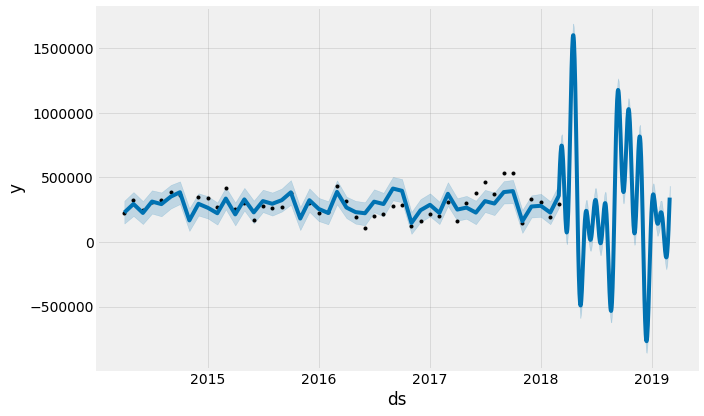

In [123]:
m.plot(forecast);

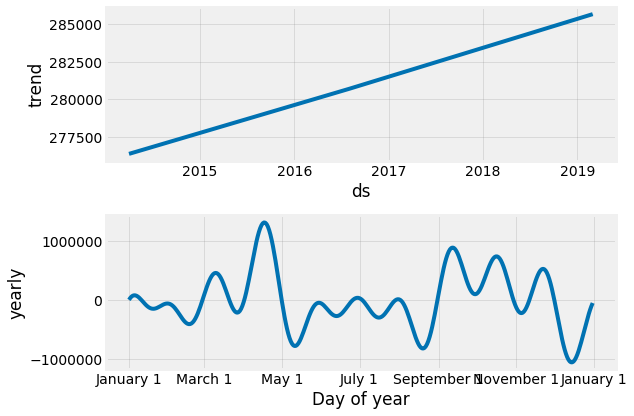

In [124]:
m.plot_components(forecast);

In [125]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,224120
2014-05-01,2014-05-01,323264
2014-06-01,2014-06-01,245309
2014-07-01,2014-07-01,309805
2014-08-01,2014-08-01,328819


In [126]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [127]:
predict=m.predict(future)

In [128]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,276371.886200,138125.458159,317434.822564,276371.886200,276371.886200,-47959.213322,-47959.213322,-47959.213322,-47959.213322,-47959.213322,-47959.213322,0.0,0.0,0.0,228412.672878
1,2014-05-01,276524.254880,201634.987536,391472.068637,276524.254880,276524.254880,18170.093269,18170.093269,18170.093269,18170.093269,18170.093269,18170.093269,0.0,0.0,0.0,294694.348149
2,2014-06-01,276681.702517,139190.383816,312249.959508,276681.702517,276681.702517,-51442.849405,-51442.849405,-51442.849405,-51442.849405,-51442.849405,-51442.849405,0.0,0.0,0.0,225238.853112
3,2014-07-01,276834.071198,221603.375830,398244.949636,276834.071198,276834.071198,36628.192086,36628.192086,36628.192086,36628.192086,36628.192086,36628.192086,0.0,0.0,0.0,313462.263284
4,2014-08-01,276991.518841,212311.805798,380768.520451,276991.518841,276991.518841,16655.961189,16655.961189,16655.961189,16655.961189,16655.961189,16655.961189,0.0,0.0,0.0,293647.480030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,285660.030116,3182.911219,180917.463185,285652.853693,285667.330045,-194493.928429,-194493.928429,-194493.928429,-194493.928429,-194493.928429,-194493.928429,0.0,0.0,0.0,91166.101687
409,2019-02-26,285665.308334,60234.680793,241682.851618,285658.114045,285672.637375,-136232.536511,-136232.536511,-136232.536511,-136232.536511,-136232.536511,-136232.536511,0.0,0.0,0.0,149432.771823
410,2019-02-27,285670.586552,120670.491347,292966.349962,285663.374397,285677.944704,-73699.164087,-73699.164087,-73699.164087,-73699.164087,-73699.164087,-73699.164087,0.0,0.0,0.0,211971.422465
411,2019-02-28,285675.864771,195919.766595,361853.951867,285668.624411,285683.252034,-8303.074508,-8303.074508,-8303.074508,-8303.074508,-8303.074508,-8303.074508,0.0,0.0,0.0,277372.790263


In [129]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,228412.672878,138125.458159,317434.822564
1,2014-05-01,294694.348149,201634.987536,391472.068637
2,2014-06-01,225238.853112,139190.383816,312249.959508
3,2014-07-01,313462.263284,221603.375830,398244.949636
4,2014-08-01,293647.480030,212311.805798,380768.520451


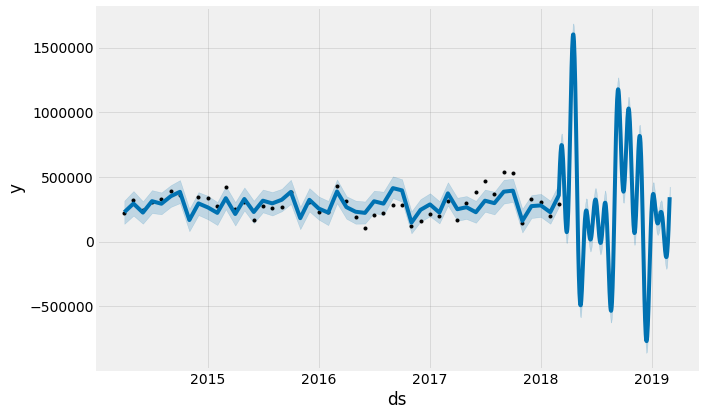

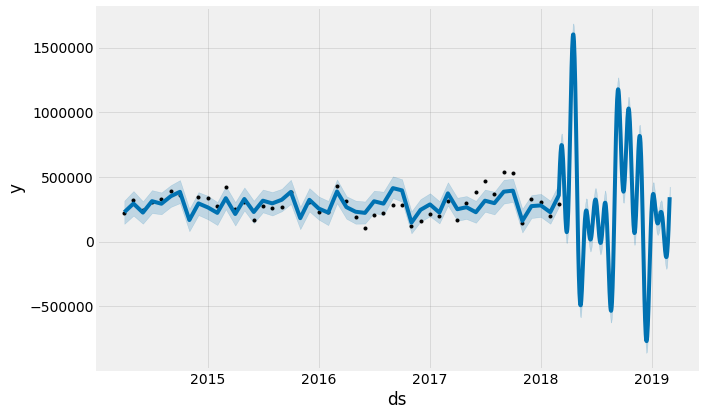

In [130]:
m.plot(predict)

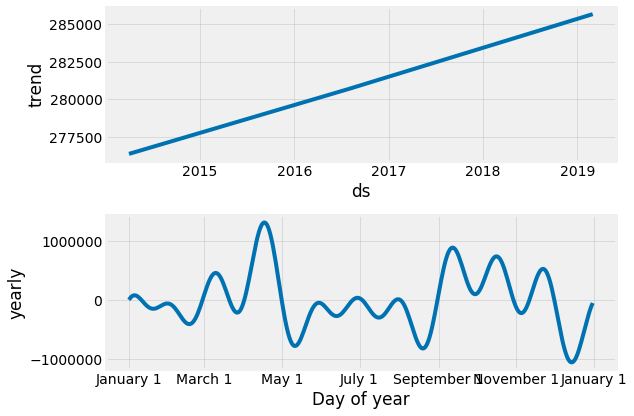

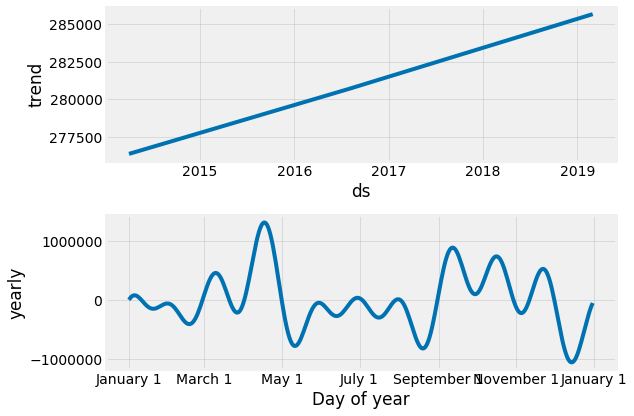

In [131]:
m.plot_components(predict)

In [132]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [133]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,303491.360397,271304.045522,333753.254746,286258,2016-09-02
1,2016-11-01,53148.711669,22807.821136,82928.922162,120878,2016-09-02
2,2016-12-01,271490.228736,242198.611084,301636.090224,159904,2016-09-02
3,2017-01-01,328484.453391,298617.839951,358249.297652,216013,2016-09-02
4,2017-02-01,62667.801661,33546.495201,91988.103196,200107,2016-09-02


In [134]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,5.146499e+08,22685.897496,22147.304536,0.111699,0.111699,1.0
1,60 days,2.659784e+09,51573.092198,47395.268503,0.361753,0.361753,0.5
2,61 days,1.243820e+10,111526.664327,105084.615406,0.515805,0.515805,0.0
3,90 days,1.637031e+10,127946.519408,127013.085608,0.584565,0.584565,0.0
4,92 days,5.339358e+10,231070.517607,209363.685907,0.752020,0.752020,0.0


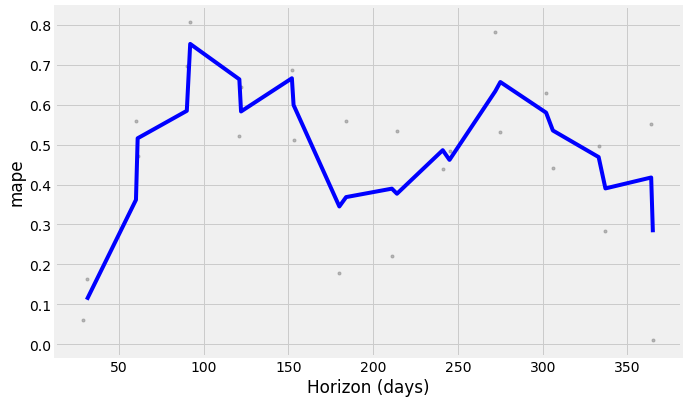

In [135]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [136]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(SI['sales'], (1,0,0)).fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


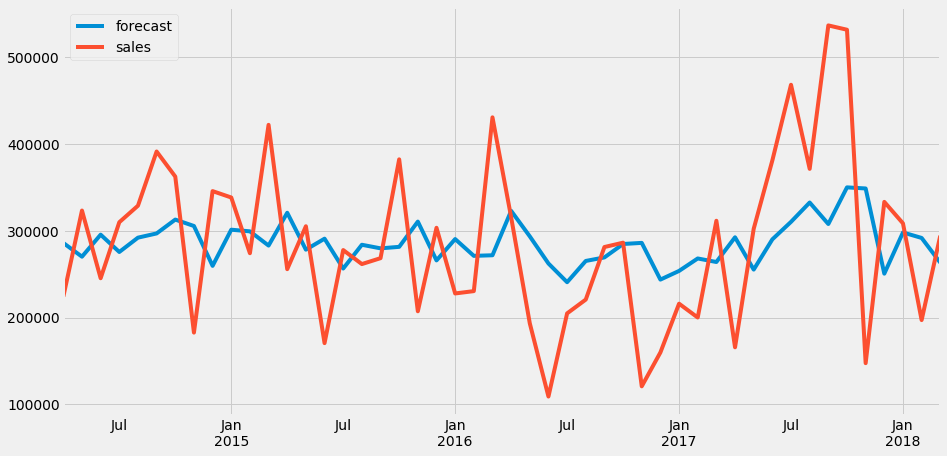

In [137]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [138]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(SI.sales, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                -617.272
Method:                       css-mle   S.D. of innovations          92985.465
Date:                Sat, 21 Aug 2021   AIC                           1240.545
Time:                        19:17:09   BIC                           1246.158
Sample:                    04-01-2014   HQIC                          1242.666
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.859e+05   1.79e+04     15.973      0.000    2.51e+05    3.21e+05
ar.L1.sales     0.2555      0.138      1.847      0.065      -0.016       0.527
                                    Roots       

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [139]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = SI.sales[:33]
test = SI.sales[33:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


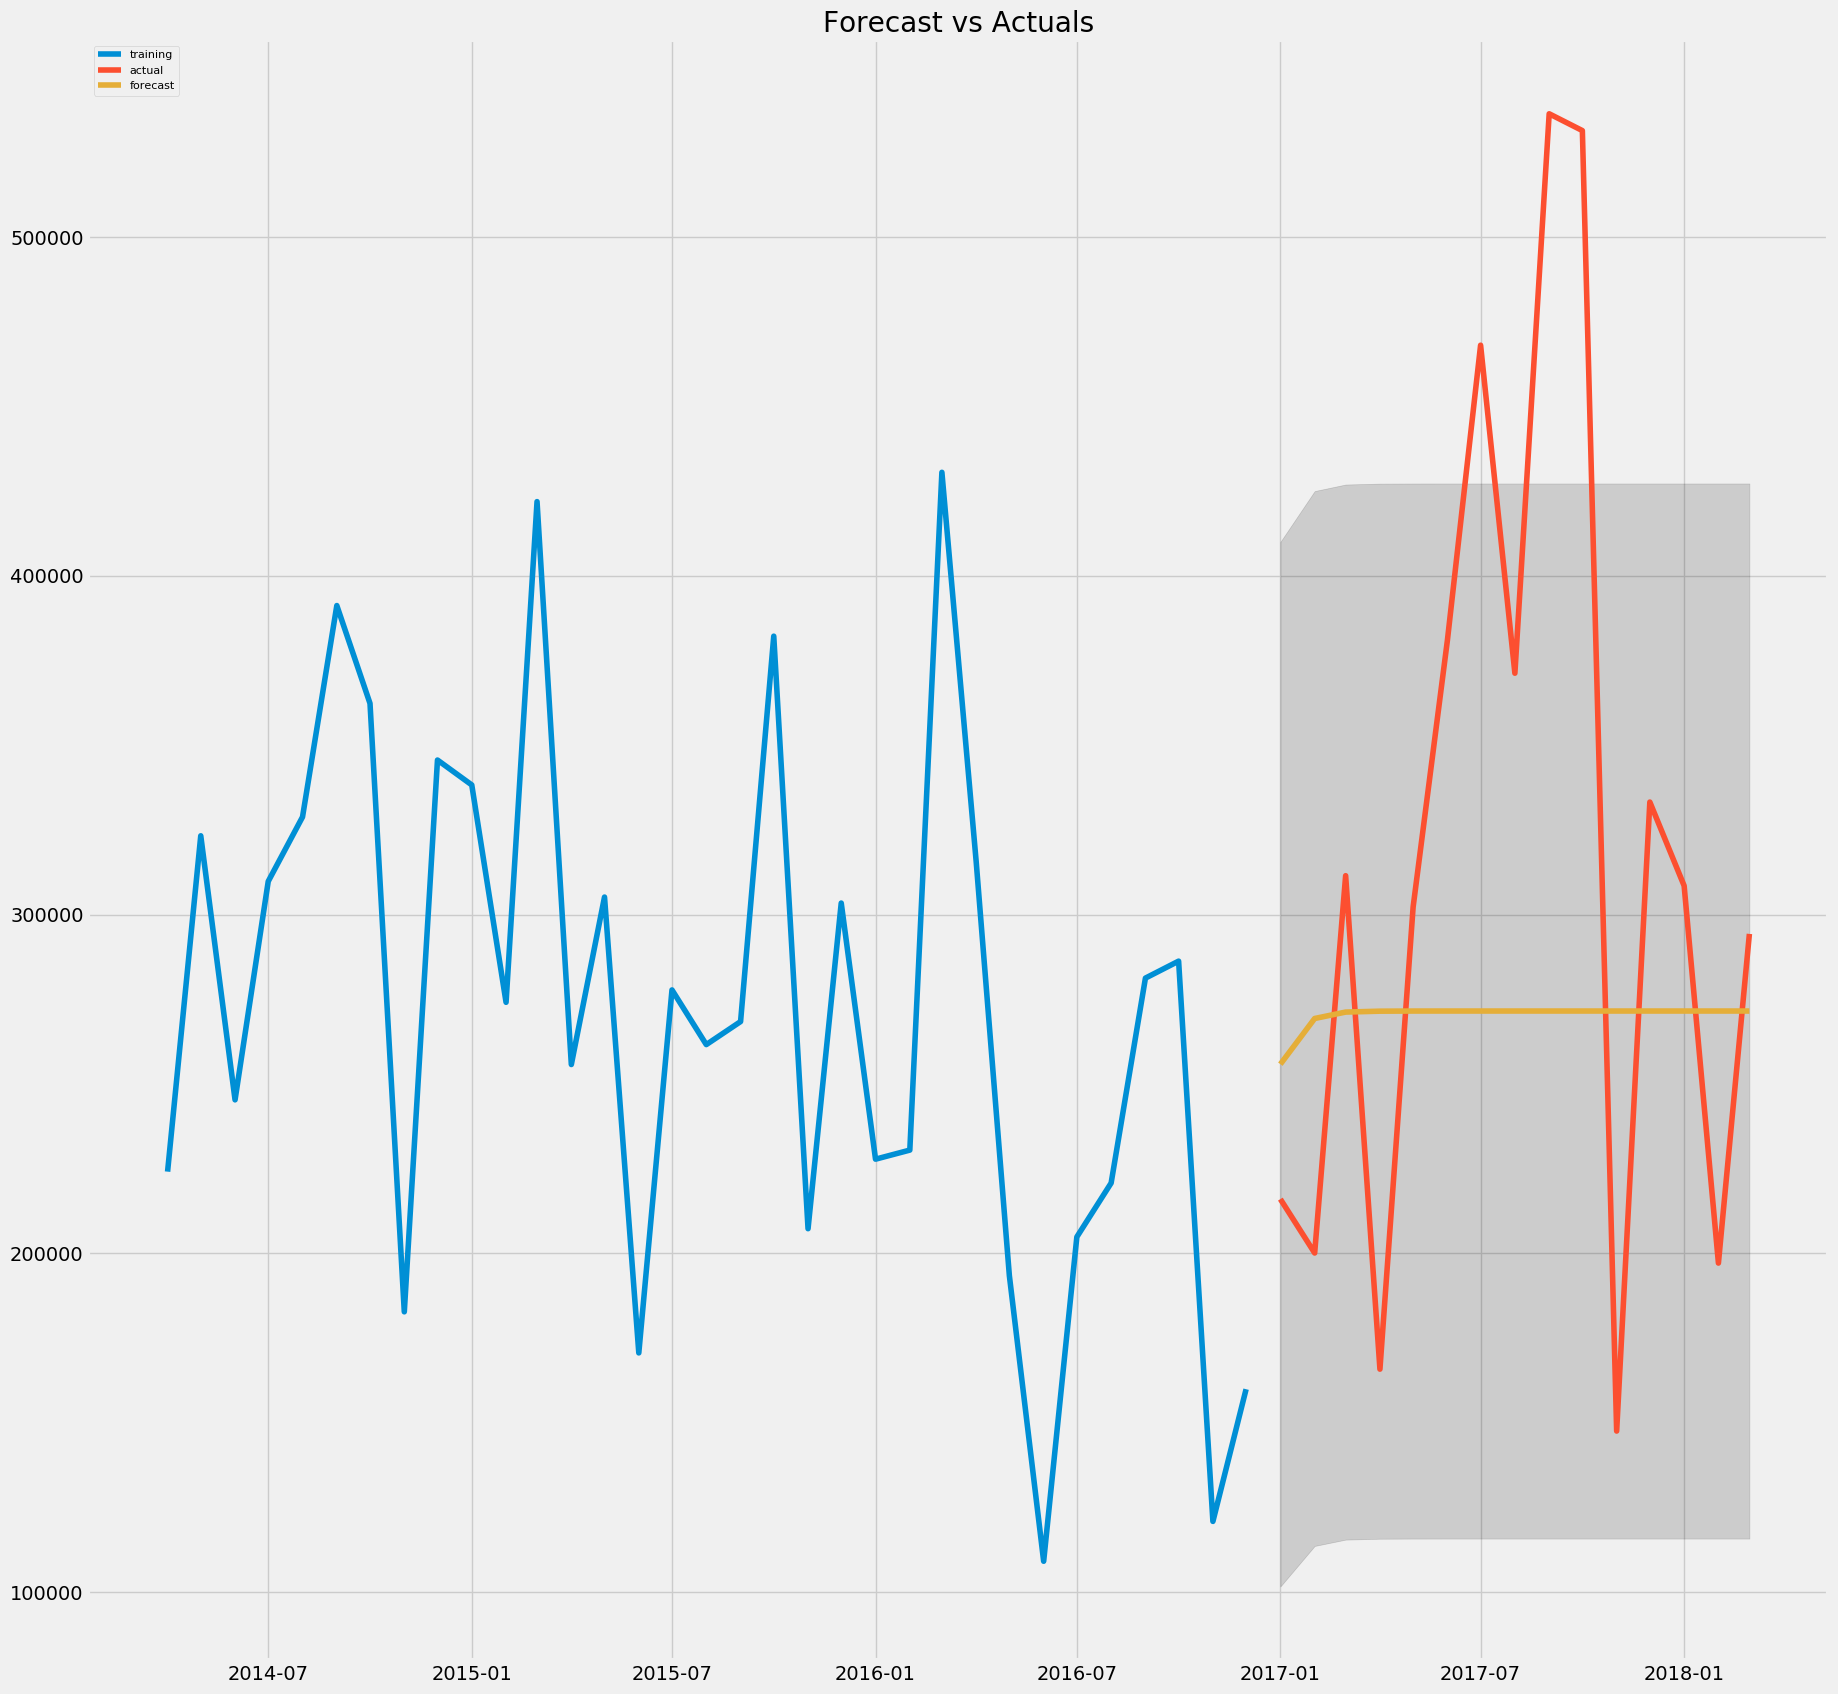

In [140]:
model = ARIMA(train, order=(1,0,0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()